# NLP Assignment - 1

# **Group No -32**
   

1.    TARAKESWARARAO SINGARATI (2022ac05105)
    
2.   PURUSHOTHAM K (2022ac05108)

3.   RAHUL VERMA (2022AC05107)
4.   HIMANSHU YADAV (2022AC05026)









Step 0: Import the required libraries

---



In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
import string
import nltk
import re
from nltk import FreqDist
from nltk.tag import hmm
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')




# df = pd.read_csv('tripadvisor_hotel_reviews_dataset2.csv')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Step 0: Load the dataset from gdrive location by installing PyDrive and calling required functions

In [ ]:

link = 'https://drive.google.com/file/d/13y7_4upuH58Fgp8tLiDN8UEw2QpKnvj9/view?usp=drive_link'



!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('tripadvisor_hotel_reviews_dataset2.csv')

df = pd.read_csv('tripadvisor_hotel_reviews_dataset2.csv')

#print to read the dataset to know the rows and column in the dataset
print(df)


                                                  Review  Rating
0      nice hotel expensive parking got good deal sta...       4
1      ok nothing special charge diamond member hilto...       2
2      nice rooms not 4* experience hotel monaco seat...       3
3      unique, great stay, wonderful time hotel monac...       5
4      great stay great stay, went seahawk game aweso...       5
...                                                  ...     ...
10494  ca n't wrong, best features seven bridges loca...       5
10495  wonderful home away home stayed seven bridges ...       5
10496  best b wife stayed room 4 adult kids stayed 8 ...       5
10497  simply wonderful wonderful 5 days beautiful ho...       5
10498  peaceful stayed room 7 september wonderful sta...       5

[10499 rows x 2 columns]


Step 1: Preprocess the dataset to convert it into a format that the algorithm can work with.

1.1: Perform pre-processing steps like Removing Punctuations, Numbers, and Special Characters, Stop Words in dataset.               (1M)

      This step involves removing punctuations, numbers, special characters, and stop words from the dataset.


1.2: Perform normalization by using Stemming or Lemmatization.  (1M)

      This step involves normalization, a crucial aspect of text preprocessing by using Stemming and Lemmatization
#Remove punctuations and numbers
# Apply preprocessing to the 'Review' column
# Remove stopwords

In [ ]:

# Initialize NLTK stemmer and lemmatizer
porter_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

# A Function preprocess_text to preform pre-processing on the dataset passed
def preprocess_text(text, use_lemmatization=True):

    # check if any text is uppercase, if yes convert to lowercase
    text = text.lower()

    #for loop to iterate and remove punctuation and numbers
    text = ''.join([char for char in text if char not in string.punctuation and not char.isdigit()])

    # Tokenize the text
    tokens = word_tokenize(text)

    # remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Perform lemmatization or stemming as per the input to the function
    if use_lemmatization:
        tokens = [wordnet_lemmatizer.lemmatize(word) for word in tokens]
    else:
        tokens = [porter_stemmer.stem(word) for word in tokens]

    return ' '.join(tokens)

#  A Function to check if we have special characters in the dataset
#def find_special_characters(Review):
#    special_characters = re.findall(r'[^a-zA-Z\s]', Review)
#    if special_characters:
#        print(f"Review: {Review}")
#        print(f"Special Characters: {special_characters}\n")

# A Function call to find special characters
#df['Review'].apply(find_special_characters)

# Call the preprocess_text function and pass the dataset to perform preprocessing on the "Review column"
df['Review_Tokens'] = df['Review'].apply(preprocess_text)

# Applying lemmatizing
df['Review_Tokens_Lemmatized'] = df['Review'].apply(lambda x: preprocess_text(x, use_lemmatization=True))

# Applying Steming
df['Review_Tokens_Stemmed'] = df['Review'].apply(lambda x: preprocess_text(x, use_lemmatization=False))

# Display the review tokens after preprocessing DataFrame
print(df.head)


<bound method NDFrame.head of                                                   Review  Rating  \
0      nice hotel expensive parking got good deal sta...       4   
1      ok nothing special charge diamond member hilto...       2   
2      nice rooms not 4* experience hotel monaco seat...       3   
3      unique, great stay, wonderful time hotel monac...       5   
4      great stay great stay, went seahawk game aweso...       5   
...                                                  ...     ...   
10494  ca n't wrong, best features seven bridges loca...       5   
10495  wonderful home away home stayed seven bridges ...       5   
10496  best b wife stayed room 4 adult kids stayed 8 ...       5   
10497  simply wonderful wonderful 5 days beautiful ho...       5   
10498  peaceful stayed room 7 september wonderful sta...       5   

                                           Review_Tokens  \
0      nice hotel expensive parking got good deal sta...   
1      ok nothing special charge 

The code initializes NLTK tools for text normalization and defines a preprocess_text function. This function converts text to lowercase, removes punctuation and numbers, tokenizes, and removes stop words. It then applies either lemmatization or stemming to the tokens. Then, the function is used to preprocess the 'Review' column, creating two versions of each review for comparison.

2. Apply a POS tagging algorithm or utilize a pretrained POS tagger to assign POS tags to the words in the dataset.                                                                (3Marks)

        In this section, we use a pre-trained POS tagger from NLTK to assign part-of-speech tags to each word in the dataset.



In [ ]:
# Function to apply POS tagging
def pos_tag_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Apply POS tagging using NLTK
    pos_tags = pos_tag(tokens)

    # Join tokens and POS tags back into a string
    tagged_text = ' '.join([f'{word}_{pos}' for word, pos in pos_tags])

    return tagged_text

# Apply POS tagging to the 'Review_Tokens' column
df['Review_POS'] = df['Review_Tokens'].apply(pos_tag_text)

# showing the POS tags to the reviews words
print(df['Review_POS'])
print([df['Review_POS'][0]])

0        nice_JJ hotel_NN expensive_JJ parking_NN got_V...
1        ok_JJ nothing_NN special_JJ charge_NN diamond_...
2        nice_JJ room_NN experience_NN hotel_NN monaco_...
3        unique_JJ great_JJ stay_NN wonderful_JJ time_N...
4        great_JJ stay_NN great_JJ stay_NN went_VBD sea...
                               ...                        
10494    ca_MD nt_VB wrong_JJ best_JJS feature_NN seven...
10495    wonderful_JJ home_NN away_RB home_NN stayed_VB...
10496    best_JJS b_NN wife_NN stayed_VBD room_NN adult...
10497    simply_RB wonderful_JJ wonderful_JJ day_NN bea...
10498    peaceful_JJ stayed_VBD room_NN september_NN wo...
Name: Review_POS, Length: 10499, dtype: object
['nice_JJ hotel_NN expensive_JJ parking_NN got_VBD good_JJ deal_NN stay_VB hotel_NN anniversary_JJ arrived_VBD late_JJ evening_NN took_VBD advice_RB previous_JJ review_NN valet_NN parking_VBG check_NN quick_JJ easy_JJ little_JJ disappointed_JJ nonexistent_JJ view_NN room_NN room_NN clean_JJ nice_JJ size

The code defines a function pos_tag_text for applying Part-of-Speech (POS) tagging to text, converting words into a format of word_POS. This process involves tokenizing the text, applying NLTK's POS tagging, and then formatting the output as a tagged string. Applied to the 'Review_Tokens' column, it creates a new 'Review_POS' column in the DataFrame. This POS tagging is essential for revealing the grammatical structure of the text, that helps us with analysis and understanding of the text

Step 3

(3.1) Calculate the frequency of each POS tag in the dataset.

      This code calculates the frequency of each POS tag in the dataset, which is essential for understanding the distribution of different parts of speech in the text.



In [ ]:

# Function to calculate the frequency of each POS tag
def calculate_pos_tag_frequency(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Apply POS tagging using NLTK
    pos_tags = pos_tag(tokens)

    # Extract POS tags
    tags = [pos for _, pos in pos_tags]

    # Calculate the frequency distribution of POS tags
    freq_dist = FreqDist(tags)

    return freq_dist

# Apply POS tagging and calculate frequency to the 'Review_Tokens' column
df['POS_Frequency'] = df['Review_Tokens'].apply(calculate_pos_tag_frequency)

# Display the preprocessed DataFrame with POS frequencies
print(df['POS_Frequency'])


0        {'JJ': 25, 'NN': 35, 'VBD': 4, 'VB': 1, 'RB': ...
1        {'JJ': 54, 'NN': 117, 'VBD': 19, 'VBN': 6, 'IN...
2        {'JJ': 48, 'NN': 110, 'VBZ': 1, 'NNS': 2, 'VBP...
3        {'JJ': 27, 'NN': 35, 'VBG': 2, 'VBD': 6, 'VBP'...
4        {'JJ': 36, 'NN': 92, 'VBD': 15, 'VBG': 11, 'RB...
                               ...                        
10494    {'MD': 2, 'VB': 4, 'JJ': 55, 'JJS': 1, 'NN': 8...
10495    {'JJ': 11, 'NN': 14, 'RB': 4, 'VBD': 2, 'CD': ...
10496     {'JJS': 3, 'NN': 21, 'VBD': 4, 'JJ': 8, 'RB': 2}
10497      {'RB': 2, 'JJ': 8, 'NN': 13, 'IN': 2, 'VBG': 2}
10498    {'JJ': 15, 'VBD': 6, 'NN': 26, 'RB': 6, 'VBG':...
Name: POS_Frequency, Length: 10499, dtype: object


Here our output represents the frequency distribution of Part-of-Speech (POS) tags for each entry in the 'Review_Tokens' column of the DataFrame. Our code utilizes the Natural Language Toolkit (NLTK) library to tokenize the text, perform POS tagging, and then calculate the frequency distribution of POS tags.

Here each entry is a dictionary where keys are POS tags (such as 'JJ' for adjectives, 'NN' for nouns, 'VBD' for past tense verbs, etc.), and the corresponding values indicate the frequency of each POS tag.

In [ ]:
print([df['POS_Frequency'][0]])

[FreqDist({'NN': 35, 'JJ': 25, 'VBG': 6, 'RB': 5, 'VBD': 4, 'VB': 1, 'IN': 1, 'NNS': 1, 'VBN': 1, 'JJR': 1})]


The POS tagging algorithm's application helps to understand the grammatical structure of the text. By assigning POS tags to each word, the algorithm provides insights into the role of each word in a sentence, such as whether it's a noun, verb, adjective, etc.


(3.2) Identify and print the most common POS tags and their frequencies.


      Here, we identify and print the most common POS tags in the dataset, along with their respective frequencies


In [ ]:

# Concatenate all POS_Frequency dictionaries into one
all_pos_freq = df['POS_Frequency'].sum()

# Create a frequency distribution from the concatenated dictionaries
total_freq_dist = FreqDist(all_pos_freq)

# Identify and print the most common POS tags and their frequencies
most_common_tags = total_freq_dist.most_common()
for tag, count in most_common_tags:
    print(f'{tag}: {count}')

NN: 496667
JJ: 243923
VBD: 64958
RB: 53075
VBG: 38371
VBP: 27277
VBN: 22834
NNS: 14619
VB: 12811
IN: 12134
JJS: 5140
JJR: 4001
VBZ: 2918
RBR: 2662
MD: 1548
FW: 1307
CC: 803
CD: 688
NNP: 656
RP: 382
RBS: 361
WP: 181
DT: 158
UH: 156
PRP: 132
WRB: 93
WDT: 35
PRP$: 32
EX: 29
TO: 22
POS: 8
PDT: 6
SYM: 4
'': 1


In this step we calculate the frequency of the POS Tags. This count helps us understand more about how the text is written. For example, if we see a lot of nouns and adjectives, the text is probably describing things a lot. But if there are many verbs, it means the text talks more about actions. Knowing which parts of speech are used most helps us figure out the style and type of the text. This is a basic step in studying language and can help in other areas like creating new text or understanding writing styles better

Step 4. Generate visualizations such as bar charts, word clouds to represent the POS tag frequencies  

      In this step, we create visual representations, such as bar charts and word clouds, to effectively convey the frequency distribution of POS tags in the dataset.


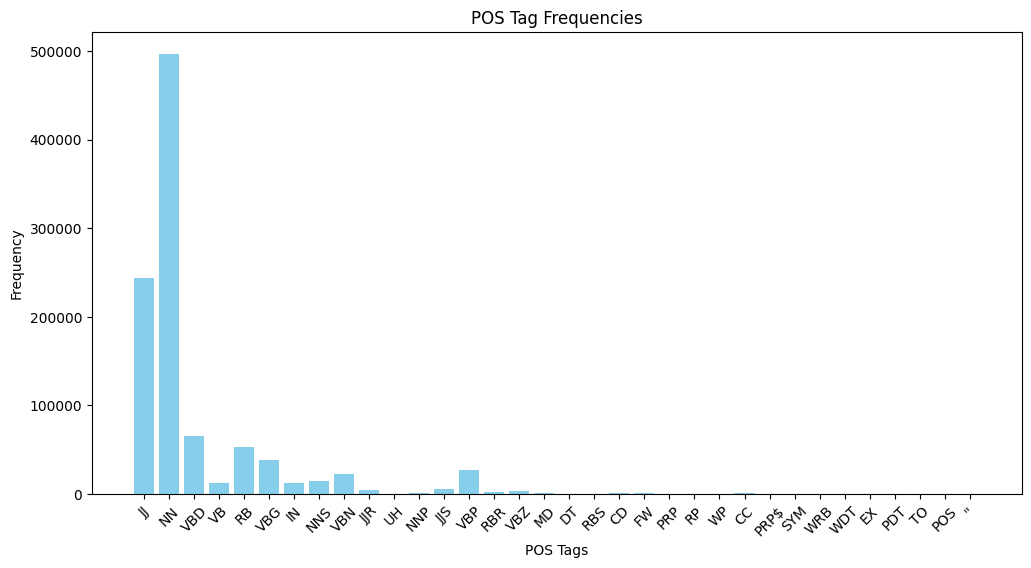

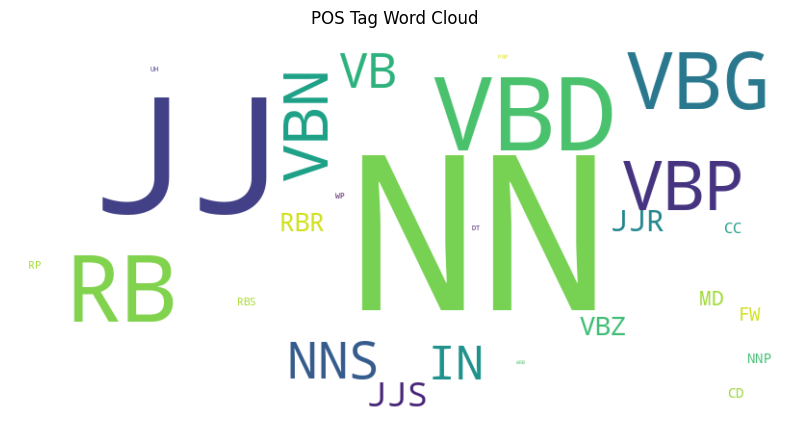

In [ ]:
# Bar Chart

# Extract tags and counts from total_freq_dist dictionary
tags, counts = zip(*total_freq_dist.items())

# create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(tags, counts, color='skyblue')
plt.title('POS Tag Frequencies')
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

#display the plot
plt.show()

# Word Cloud

#create a "wordcloud" object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(total_freq_dist)

#create the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('POS Tag Word Cloud')

#Display the wordcloud to represent the POS tag frequencies, here the size shows the frequency of the said tag
plt.show()


In this step we have printed charts like bar graphs and word clouds to show how often different parts of speech (like nouns, verbs) appear in the text. Bar graphs make it easy to see which parts of speech are used most by showing them in different lengths. Word clouds are easy to understand because they show the most common parts of speech in bigger sizes. These pictures help us quickly see and understand the main grammar parts in the text.
We could clearly see over here (from Bar Chart or Word cloud) the most frequent tag is ‘NN’, which stands for singular or mass nouns. This indicates that nouns are the most common part of speech in this dataset. Other tags like ‘IN’ (preposition or subordinating conjunction), ‘DT’ (determiner), and ‘JJ’ (adjective) also have significant frequencies but are less common compared to ‘NN’.

Step 5. Display the HMM POS tagging on the first 4 rows of the dataset. (2 Marks)

    This section demonstrates the application of Hidden Markov Model (HMM) for POS tagging on the first four rows of the dataset.


In [ ]:
#function to add POStags
def hmm_pos_tagging(text):
    sentences = sent_tokenize(text)
    tagged_sequences = [nltk.pos_tag(word_tokenize(sentence)) for sentence in sentences]
    pos_tagger = hmm.HiddenMarkovModelTrainer().train(tagged_sequences)
    pos_tags = pos_tagger.tag_sents([word_tokenize(sentence) for sentence in sentences])
    return pos_tags

#Calling the HMM_POS_Tags function to the 'Review' column
df['HMM_POS_Tags'] = df['Review'].head(4).apply(hmm_pos_tagging)

# for loop to print the result for the
for index, row in df.head(4).iterrows():
    print(f"Review {index + 1} POS Tags:")
    print(row.HMM_POS_Tags)
    print("\t")

Review 1 POS Tags:
[[('nice', 'JJ'), ('hotel', 'NN'), ('expensive', 'JJ'), ('parking', 'NN'), ('got', 'VBD'), ('good', 'JJ'), ('deal', 'NN'), ('stay', 'VB'), ('hotel', 'NN'), ('anniversary', 'NN'), (',', ','), ('arrived', 'VBN'), ('late', 'JJ'), ('evening', 'NN'), ('took', 'VBD'), ('advice', 'RB'), ('previous', 'JJ'), ('reviews', 'NNS'), ('did', 'VBD'), ('valet', 'NN'), ('parking', 'NN'), (',', ','), ('check', 'VB'), ('quick', 'JJ'), ('easy', 'NN'), (',', ','), ('little', 'RB'), ('disappointed', 'JJ'), ('non-existent', 'JJ'), ('view', 'NN'), ('room', 'NN'), ('room', 'NN'), ('clean', 'JJ'), ('nice', 'JJ'), ('size', 'NN'), (',', ','), ('bed', 'VBD'), ('comfortable', 'JJ'), ('woke', 'NN'), ('stiff', 'JJ'), ('neck', 'RB'), ('high', 'JJ'), ('pillows', 'NNS'), (',', ','), ('not', 'RB'), ('soundproof', 'JJ'), ('like', 'IN'), ('heard', 'NN'), ('music', 'NN'), ('room', 'NN'), ('night', 'NN'), ('morning', 'NN'), ('loud', 'JJ'), ('bangs', 'NNS'), ('doors', 'NNS'), ('opening', 'VBG'), ('closing', 

Here we applied a technique called HMM POS tagging to mark the grammar parts, like nouns and verbs, in a few reviews. This is helpful to understand sentences and how words work together. By trying it out on some examples, we get a closer look at how sentences are put together. This helps because it makes it easier to understand how words are used in sentences.
From above output we can interpret as model has tagged words in the Review dataframe with their corresponding POS tags using the HMM, Example: ('nice', 'JJ') indicates that 'nice' has been tagged as an adjective (JJ). Hence we can say that HMM POS tagging appears to work well, capturing different parts of speech for various words in the dataframe.
Here our HMM model is capturing details like adjectives, complex structures like compound words ('hotels', 'NNS'), punctuation and symbols effectively. 